## Regress: International Airline Passenger Data
https://datamarket.com/data/set/22u3/international-airline-passengers-monthly-totals-in-thousands-jan-49-dec-60#!ds=22u3&display=line

** Dataset Information: **

144 observations from January 1949 to December 1960 or 12 years

** Attribute Information: **

International airline passengers: monthly totals in thousands

** Objective of this project **

predict the number of international airline passengers in units of 1,000

## Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
df = pd.read_csv('international-airline-passengers.csv',
                usecols=[1], engine='python', skipfooter=3)

In [13]:
df.head()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,112
1,118
2,132
3,129
4,121


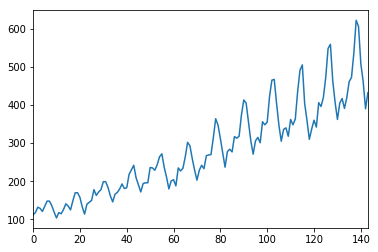

In [14]:
df.plot(legend=False)

## LSTM Network

#### Data preprocessing

In [96]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# read data
df = pd.read_csv('international-airline-passengers.csv',
                usecols=[1], engine='python', skipfooter=3)

# scale feature
scaler = MinMaxScaler()
df = scaler.fit_transform(df.values.astype('float32'))

# split train test sets
split_ratio = 0.67
train_size = int(len(df) * split_ratio)
test_size = len(df) - train_size
train_set, test_set = df[0:train_size,:], df[train_size:len(df),:]
print(train_set.shape, test_set.shape)

# reshape into X=t and Y=t+1
look_back = 1
X_train, y_train = create_dataset(train_set, look_back)
X_test, y_test = create_dataset(test_set, look_back)

# reshape to [samples, time steps, features]
X_train= np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(96, 1) (48, 1)
(94, 1, 1) (94,) (46, 1, 1) (46,)


#### Model train

In [88]:
seed = 101 
np.random.seed(seed)
K.clear_session()

# create the model
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())
# fit the model
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 4)                 96        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
 - 1s - loss: 0.0441
Epoch 2/100
 - 0s - loss: 0.0206
Epoch 3/100
 - 0s - loss: 0.0159
Epoch 4/100
 - 0s - loss: 0.0145
Epoch 5/100
 - 0s - loss: 0.0135
Epoch 6/100
 - 0s - loss: 0.0125
Epoch 7/100
 - 0s - loss: 0.0114
Epoch 8/100
 - 0s - loss: 0.0105
Epoch 9/100
 - 0s - loss: 0.0094
Epoch 10/100
 - 0s - loss: 0.0083
Epoch 11/100
 - 0s - loss: 0.0073
Epoch 12/100
 - 0s - loss: 0.0063
Epoch 13/100
 - 0s - loss: 0.0053
Epoch 14/100
 - 0s - loss: 0.0044
Epoch 15/100
 - 0s - loss: 0.0036
Epoch 16/100
 - 0s - loss: 0.0030


#### Model Evaluation

Train RMSE Score: 23.07
Test RMSE Score: 49.84


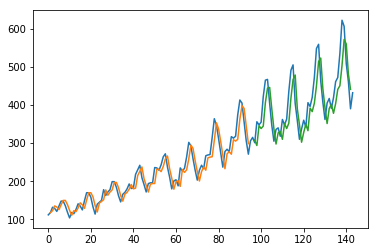

In [89]:
# make predictions
y_pred_train = scaler.inverse_transform(model.predict(X_train))
y_pred_test = scaler.inverse_transform(model.predict(X_test))
# inverse transform y
y_train = scaler.inverse_transform(y_train.reshape(-1,1))
y_test = scaler.inverse_transform(y_test.reshape(-1,1))

# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(y_train,y_pred_train))
print('Train RMSE Score: %.2f' % (trainScore))
testScore = np.sqrt(mean_squared_error(y_test,y_pred_test))
print('Test RMSE Score: %.2f' % (testScore))

# visualize the results
# shift train predictions for plotting
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(y_pred_train)+look_back, :] = y_pred_train
# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(y_pred_train)+(look_back*2)+1:len(df)-1, :] = y_pred_test
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

## LSTM with Window Method

** Data Preprocessing **

In [97]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# read data
df = pd.read_csv('international-airline-passengers.csv',
                usecols=[1], engine='python', skipfooter=3)

# scale feature
scaler = MinMaxScaler()
df = scaler.fit_transform(df.values.astype('float32'))

# split train test sets
split_ratio = 0.67
train_size = int(len(df) * split_ratio)
test_size = len(df) - train_size
train_set, test_set = df[0:train_size,:], df[train_size:len(df),:]
print(train_set.shape, test_set.shape)

# reshape into X=t and Y=t+1
look_back = 3
X_train, y_train = create_dataset(train_set, look_back)
X_test, y_test = create_dataset(test_set, look_back)

# reshape to [samples, time steps, features]
X_train= np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(96, 1) (48, 1)
(92, 1, 3) (92,) (44, 1, 3) (44,)


#### Model Train

In [82]:
seed = 101
np.random.seed(seed)
K.clear_session()

# create the model
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())
# fit the model
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 4)                 128       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
 - 1s - loss: 0.0542
Epoch 2/100
 - 0s - loss: 0.0258
Epoch 3/100
 - 0s - loss: 0.0167
Epoch 4/100
 - 0s - loss: 0.0145
Epoch 5/100
 - 0s - loss: 0.0129
Epoch 6/100
 - 0s - loss: 0.0116
Epoch 7/100
 - 0s - loss: 0.0104
Epoch 8/100
 - 0s - loss: 0.0094
Epoch 9/100
 - 0s - loss: 0.0081
Epoch 10/100
 - 0s - loss: 0.0074
Epoch 11/100
 - 0s - loss: 0.0066
Epoch 12/100
 - 0s - loss: 0.0060
Epoch 13/100
 - 0s - loss: 0.0056
Epoch 14/100
 - 0s - loss: 0.0052
Epoch 15/100
 - 0s - loss: 0.0050
Epoch 16/100
 - 0s - loss: 0.0049


#### Model Evaluation

Train RMSE Score: 24.19
Test RMSE Score: 58.04


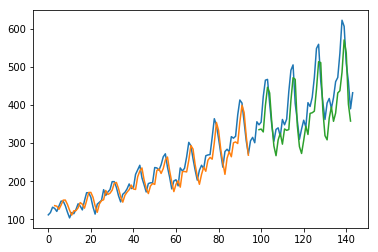

In [83]:
# make predictions
y_pred_train = scaler.inverse_transform(model.predict(X_train))
y_pred_test = scaler.inverse_transform(model.predict(X_test))
# inverse transform y
y_train = scaler.inverse_transform(y_train.reshape(-1,1))
y_test = scaler.inverse_transform(y_test.reshape(-1,1))

# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(y_train,y_pred_train))
print('Train RMSE Score: %.2f' % (trainScore))
testScore = np.sqrt(mean_squared_error(y_test,y_pred_test))
print('Test RMSE Score: %.2f' % (testScore))

# visualize the results
# shift train predictions for plotting
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(y_pred_train)+look_back, :] = y_pred_train
# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(y_pred_train)+(look_back*2)+1:len(df)-1, :] = y_pred_test
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

## LSTM with Time Steps

#### Data Preprocessing

In [98]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# read data
df = pd.read_csv('international-airline-passengers.csv',
                usecols=[1], engine='python', skipfooter=3)

# scale feature
scaler = MinMaxScaler()
df = scaler.fit_transform(df.values.astype('float32'))

# split train test sets
split_ratio = 0.67
train_size = int(len(df) * split_ratio)
test_size = len(df) - train_size
train_set, test_set = df[0:train_size,:], df[train_size:len(df),:]
print(train_set.shape, test_set.shape)

# reshape into X=t and Y=t+1
look_back = 3
X_train, y_train = create_dataset(train_set, look_back)
X_test, y_test = create_dataset(test_set, look_back)

# reshape to [samples, time steps, features]
X_train= np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(96, 1) (48, 1)
(92, 3, 1) (92,) (44, 3, 1) (44,)


#### Model Train

In [94]:
seed = 101 
np.random.seed(seed)
K.clear_session()

# create the model
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())
# fit the model
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 4)                 96        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
 - 1s - loss: 0.0285
Epoch 2/100
 - 0s - loss: 0.0117
Epoch 3/100
 - 0s - loss: 0.0097
Epoch 4/100
 - 0s - loss: 0.0086
Epoch 5/100
 - 0s - loss: 0.0074
Epoch 6/100
 - 0s - loss: 0.0065
Epoch 7/100
 - 0s - loss: 0.0058
Epoch 8/100
 - 0s - loss: 0.0053
Epoch 9/100
 - 0s - loss: 0.0045
Epoch 10/100
 - 0s - loss: 0.0044
Epoch 11/100
 - 0s - loss: 0.0041
Epoch 12/100
 - 0s - loss: 0.0041
Epoch 13/100
 - 0s - loss: 0.0040
Epoch 14/100
 - 0s - loss: 0.0039
Epoch 15/100
 - 0s - loss: 0.0039
Epoch 16/100
 - 0s - loss: 0.0039


#### Model Evaluation

Train RMSE Score: 23.70
Test RMSE Score: 58.93


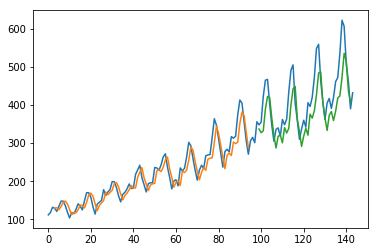

In [95]:
# make predictions
y_pred_train = scaler.inverse_transform(model.predict(X_train))
y_pred_test = scaler.inverse_transform(model.predict(X_test))
# inverse transform y
y_train = scaler.inverse_transform(y_train.reshape(-1,1))
y_test = scaler.inverse_transform(y_test.reshape(-1,1))

# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(y_train,y_pred_train))
print('Train RMSE Score: %.2f' % (trainScore))
testScore = np.sqrt(mean_squared_error(y_test,y_pred_test))
print('Test RMSE Score: %.2f' % (testScore))

# visualize the results
# shift train predictions for plotting
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(y_pred_train)+look_back, :] = y_pred_train
# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(y_pred_train)+(look_back*2)+1:len(df)-1, :] = y_pred_test
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

## LSTM with Memory b/w Batches

#### Data Preprocessing

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# read data
df = pd.read_csv('international-airline-passengers.csv',
                usecols=[1], engine='python', skipfooter=3)

# scale feature
scaler = MinMaxScaler()
df = scaler.fit_transform(df.values.astype('float32'))

# split train test sets
split_ratio = 0.67
train_size = int(len(df) * split_ratio)
test_size = len(df) - train_size
train_set, test_set = df[0:train_size,:], df[train_size:len(df),:]
print(train_set.shape, test_set.shape)

# reshape into X=t and Y=t+1
look_back = 3
X_train, y_train = create_dataset(train_set, look_back)
X_test, y_test = create_dataset(test_set, look_back)

# reshape to [samples, time steps, features]
X_train= np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

#### Model Train

In [100]:
seed = 101
np.random.seed(seed)
K.clear_session()

# create the model
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())
# fit the model
for i in range(100):
    model.fit(X_train, y_train, epochs=1, batch_size=batch_size,
              shuffle=False, verbose=2)
    model.reset_states()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (1, 4)                    96        
_________________________________________________________________
dense_1 (Dense)              (1, 1)                    5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1
 - 1s - loss: 0.0051
Epoch 1/1
 - 0s - loss: 0.0122
Epoch 1/1
 - 0s - loss: 0.0085
Epoch 1/1
 - 0s - loss: 0.0066
Epoch 1/1
 - 0s - loss: 0.0055
Epoch 1/1
 - 0s - loss: 0.0050
Epoch 1/1
 - 0s - loss: 0.0048
Epoch 1/1
 - 0s - loss: 0.0046
Epoch 1/1
 - 0s - loss: 0.0046
Epoch 1/1
 - 0s - loss: 0.0045
Epoch 1/1
 - 0s - loss: 0.0045
Epoch 1/1
 - 0s - loss: 0.0044
Epoch 1/1
 - 0s - loss: 0.0044
Epoch 1/1
 - 0s - loss: 0.0043
Epoch 1/1
 - 0s - loss: 0.0043
Epoch 1/1
 - 0s - loss: 0.0043
Epoch 1/1
 - 0s - loss: 0.0042
Epoch 1/

#### Model Evaluation

Train RMSE Score: 25.94
Test RMSE Score: 51.00


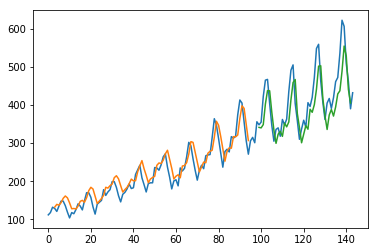

In [101]:
# make predictions
y_pred_train = scaler.inverse_transform(model.predict(X_train, batch_size=batch_size))
y_pred_test = scaler.inverse_transform(model.predict(X_test, batch_size=batch_size))
# inverse transform y
y_train = scaler.inverse_transform(y_train.reshape(-1,1))
y_test = scaler.inverse_transform(y_test.reshape(-1,1))

# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(y_train,y_pred_train))
print('Train RMSE Score: %.2f' % (trainScore))
testScore = np.sqrt(mean_squared_error(y_test,y_pred_test))
print('Test RMSE Score: %.2f' % (testScore))

# visualize the results
# shift train predictions for plotting
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(y_pred_train)+look_back, :] = y_pred_train
# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(y_pred_train)+(look_back*2)+1:len(df)-1, :] = y_pred_test
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

## Stackd LSTM with Memory b/w Batches

#### Data Preprocessing

In [102]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# read data
df = pd.read_csv('international-airline-passengers.csv',
                usecols=[1], engine='python', skipfooter=3)

# scale feature
scaler = MinMaxScaler()
df = scaler.fit_transform(df.values.astype('float32'))

# split train test sets
split_ratio = 0.67
train_size = int(len(df) * split_ratio)
test_size = len(df) - train_size
train_set, test_set = df[0:train_size,:], df[train_size:len(df),:]
print(train_set.shape, test_set.shape)

# reshape into X=t and Y=t+1
look_back = 3
X_train, y_train = create_dataset(train_set, look_back)
X_test, y_test = create_dataset(test_set, look_back)

# reshape to [samples, time steps, features]
X_train= np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(96, 1) (48, 1)
(92, 3, 1) (92,) (44, 3, 1) (44,)


#### Model Train

In [103]:
seed = 101
np.random.seed(seed)
K.clear_session()

# create the model
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), 
               stateful=True, return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), 
               stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())
# fit the model
for i in range(100):
    model.fit(X_train, y_train, epochs=1, batch_size=batch_size,
              shuffle=False, verbose=2)
    model.reset_states()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (1, 3, 4)                 96        
_________________________________________________________________
lstm_2 (LSTM)                (1, 4)                    144       
_________________________________________________________________
dense_1 (Dense)              (1, 1)                    5         
Total params: 245
Trainable params: 245
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1
 - 2s - loss: 0.0052
Epoch 1/1
 - 0s - loss: 0.0190
Epoch 1/1
 - 0s - loss: 0.0139
Epoch 1/1
 - 0s - loss: 0.0103
Epoch 1/1
 - 0s - loss: 0.0078
Epoch 1/1
 - 0s - loss: 0.0064
Epoch 1/1
 - 0s - loss: 0.0058
Epoch 1/1
 - 0s - loss: 0.0055
Epoch 1/1
 - 0s - loss: 0.0054
Epoch 1/1
 - 0s - loss: 0.0053
Epoch 1/1
 - 0s - loss: 0.0053
Epoch 1/1
 - 0s - loss: 0.0053
Epoch 1/1
 - 0s - loss: 0.0052


#### Model Evaluation

Train RMSE Score: 23.50
Test RMSE Score: 91.92


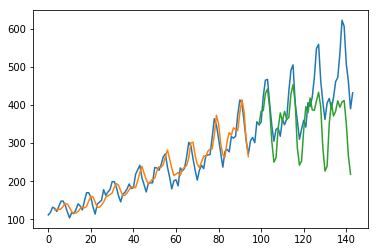

In [104]:
# make predictions
y_pred_train = scaler.inverse_transform(model.predict(X_train, batch_size=batch_size))
y_pred_test = scaler.inverse_transform(model.predict(X_test, batch_size=batch_size))
# inverse transform y
y_train = scaler.inverse_transform(y_train.reshape(-1,1))
y_test = scaler.inverse_transform(y_test.reshape(-1,1))

# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(y_train,y_pred_train))
print('Train RMSE Score: %.2f' % (trainScore))
testScore = np.sqrt(mean_squared_error(y_test,y_pred_test))
print('Test RMSE Score: %.2f' % (testScore))

# visualize the results
# shift train predictions for plotting
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(y_pred_train)+look_back, :] = y_pred_train
# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(y_pred_train)+(look_back*2)+1:len(df)-1, :] = y_pred_test
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()